In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

import aux_functions as aux
import plotting_functions as plots
from misc import ListDict

%matplotlib inline

In [2]:
main_data, keys = aux.prepare_data()
keys['remarks_yippy']

['What did you like about Yippy?', 'What did you not like about Yippy?']

In [3]:
word_counts = [aux.count_words(main_data, label=label) for label in keys['remarks_yippy']]

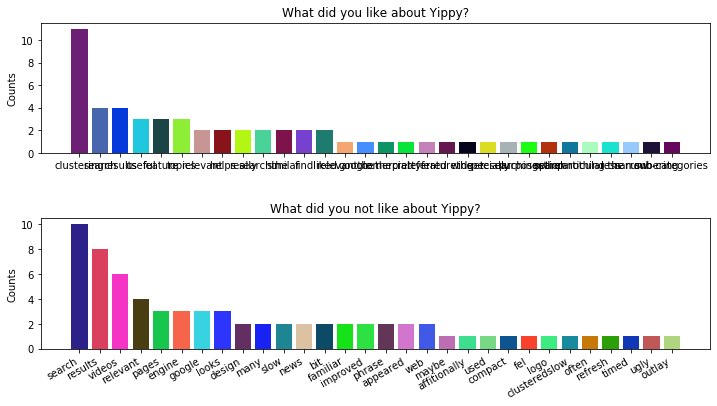

In [4]:
fig = plots.make_plot(word_counts, counted=True, kind='bar', fig_kwargs=dict(figsize=(12,6)), limit=30, break_labels=False,
                     nrows=3, sharex=False)
fig.subplots_adjust(hspace=0.5)